In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Figura 2.2

Vamos a integrar la ecuación 2.29 con condición inicial $u(0)=1$

\begin{equation}
\dfrac{du(t)}{dt} = -u(t) \:\:\:\:\:(2.29)
\end{equation}


La solución analítica de $u(t)=e^{-t}$
y $h=-u $

#### Hacemos el vector de tiempo y escribimos la función $u(t)$

In [14]:
dt = 0.2
t = np.arange(0,2.5,dt)

u = np.exp(-t)

#### Integramos haciendo la diferenciación por derecha
\begin{equation}
u(t_{n+1}) = u(t_{n}) + h(t_{n})  dt
\end{equation}
\begin{equation}
= u(t_{n}) - u(t_{n})  dt 
\end{equation}
\begin{equation}
= u(t_{n})  (1 - dt)
\end{equation}

In [31]:
u_d = np.zeros(len(u))

u_d[0] = u[0]
#h = -u
for i in range(0,len(u)-1):  
    u_d[i+1] = u_d[i] * (1. - dt)

#### Integramos haciendo la diferenciación por izquierda
\begin{equation}
u(t_{n+1}) = u(t_{n}) + h(t_{n+1})  dt
\end{equation}
\begin{equation}
= u(t_{n}) - u(t_{n+1})  dt 
\end{equation}
\begin{equation}
= u(t_{n}) / (1 + dt)
\end{equation}


In [35]:
u_i = np.zeros(len(u))

u_i[0] = u[0]
#h = -u
for i in range(0,len(u)-1):  
    u_i[i+1] = u_i[i]/(1. + dt)

#### Integramos haciendo la diferenciación centrada
\begin{equation}
u(t_{n+1}) = u(t_{n}) + \dfrac{[h(t_{n}) + h(t_{n+1})]}{2} dt
\end{equation}
\begin{equation}
= u(t_{n}) - \dfrac{[u(t_{n}) + u(t_{n+1})]}{2} dt 
\end{equation}
\begin{equation}
= u(t_{n})\dfrac{2-dt}{2+dt}
\end{equation}

In [45]:
u_c = np.zeros(len(u))

u_c[0] = u[0]
#h = -u
for i in range(0,len(u)-1):  
    u_c[i+1] = u_c[i] * (2. - dt)/(2. + dt)

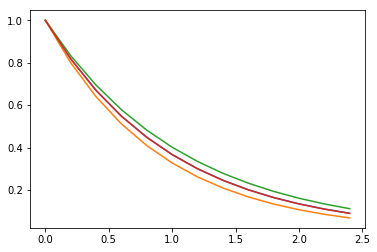

In [38]:
plt.plot(t,u)
plt.plot(t,u_d)
plt.plot(t,u_i)
plt.plot(t,u_c)

#### Calculamos los errores

In [43]:
error_d = (u_d - u)/u
error_i = (u_i - u)/u
error_c = (u_c - u)/u

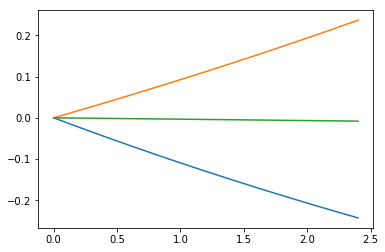

In [44]:
plt.plot(t,error_d)
plt.plot(t,error_i)
plt.plot(t,error_c)

# Figura 2.3

Vamos a integrar la ecuación 2.30, con el esquema de la ec. 2.32 y con condición inicial $w(x,1)$, obtenida de la ec. 2.31 para t=1

\begin{equation}
\dfrac{du}{dt} = v_{d}\dfrac{d^{2}u}{dx^{2}} \:\:\:\:\:(2.30)
\end{equation}

\begin{equation}
w(x,t) = 2 \sum_{n=1}^{\infty}sin(\dfrac{\pi n}{2})sin(\pi nx)exp(-\pi^{2}n^{2}v_{d}t) \:\:\:\:\:(2.31)
\end{equation}

\begin{equation}
u^{n+1}_{j} = u^{n}_{j} + \dfrac{v_{d}\Delta t}{(\Delta x)^{2}}(u^{n}_{j+1} + u^{n}_{j-1} -2 u^{n}_{j}) \:\:\:\:\:(2.32)
\end{equation}


## Calculamos el W

In [46]:
dt = [0.2, 0.1, 0.05]

#### W en t0 =1 y t1 =3

In [47]:
t0 = 1.
t1 = 3.

def w(x, t, vd):
    sumatoria = 0.
    for i in range(1,1000):
        q1 = np.sin(pi*i/2.)
        q2 = np.sin(pi*i*x)
        q3 = np.exp(-vd*t*(pi*i)**2.)
        
        sumatoria = sumatoria + q1*q2*q3

    w = 2*sumatoria
    
    return w


In [42]:
0.5-(40*0.02)
1.+(40*0.02)

1.8

(-0.3, 1.8)

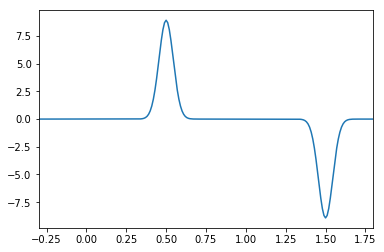

In [43]:
xx = np.arange(-2,2,0.01)
plt.plot(xx,w(xx, t0, 0.001))
plt.xlim(-0.3,1.8)

(0.5, 1)

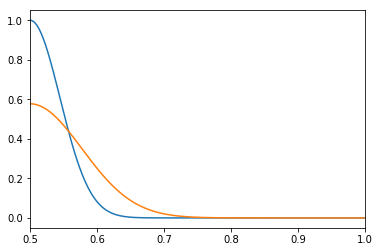

In [26]:
import numpy as np
x = np.arange(0.5,1,0.001)
vd = 0.001

plt.plot(x,w(x,t0,vd)/w(0.5,t0,vd))
plt.plot(x,w(x,t1,vd)/w(0.5,t0,vd))
plt.xlim(0.5,1)

## Integramos con diferentes dt

filas= 10 colum= 47
filas= 20 colum= 67
filas= 40 colum= 107


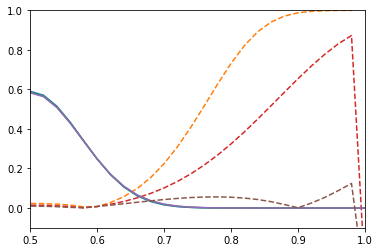

In [75]:
dx = 0.02
dt = np.array([0.2,0.1,0.05])

for k in range(0,3):
    filas = np.int((t1-t0)/dt[k])
    
    aux = (filas+1) * dx
    x = np.arange(0.5-aux,1.+aux, dx) #acá agregamos tantos puntos como pasos de integración tenemos (porque los vamos a perder)
    
    colum = np.int(len(x))
    
    print 'filas=', filas, 'colum=', colum

    u  = np.zeros([filas, colum])
    u[0,:] = w(x,t0,vd)

#     print np.shape(u)

    for i in range(0,filas-1):
#         print i
        for j in range(i, colum-i-1):
            u[i+1,j] = u[i,j] + vd * dt[k]/dx**2 * (u[i,j+1] + u[i,j-1] - 2*u[i,j])
            
    plt.plot(x,u[-1,:]/w(0.5,t0,vd))
    plt.xlim(0.5,1)
    plt.ylim(-0.1,1.)
    
    error = abs(u[-1,:] - w(x,t1,vd))/w(x,t1,vd)
    
    plt.plot (x, error,'--')
# plt.plot(x,w(x,t1,vd)/10)

In [33]:
np.float128(1./3)

0.33333333333333331483

filas= 10 colum= 36
filas= 20 colum= 46
filas= 40 colum= 66


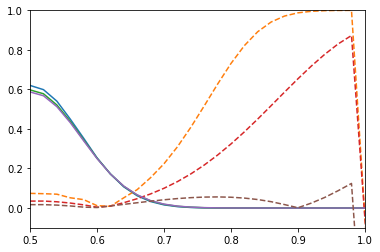

In [76]:
dx = 0.02
dt = np.array([0.2,0.1,0.05])
vd = 0.001

for k in range(0,3):
    filas = np.int((t1-t0)/dt[k])
    
    aux = (filas+1) * dx
    x = np.arange(0.5, 1.+aux, dx)
    
    colum = np.int(len(x))
    
    print 'filas=', filas, 'colum=', colum

    u  = np.zeros([filas, colum])
    u[0,:] = w(x,t0,vd)
    
#     print np.shape(u)

    for i in range(0,filas-1):
        u[i+1,0] = w(x[0], t0 + (dt[k]*i), vd)
        
#         print w(x[0], t0 + (dt[k]*i), vd)
        for j in range(1, colum-i-1):            
            u[i+1,j] = u[i,j] + vd * dt[k]/dx**2 * (u[i,j+1] + u[i,j-1] - 2*u[i,j])
            
    plt.plot(x,u[-1,:]/w(0.5,t0,vd))
    plt.xlim(0.5,1)
    plt.ylim(-0.1,1.)
    
    error = abs(u[-1,:] - w(x,t1,vd))/w(x,t1,vd)
    
    plt.plot (x, error,'--')
# plt.plot(x,w(x,t1,vd)/10)

## Integramos con diferentes dx

filas= 10 colum= 47
filas= 10 colum= 72
filas= 10 colum= 122


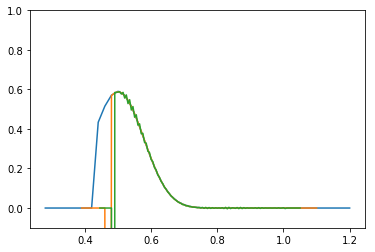

In [81]:
dx = np.array([0.02,0.01,0.005])
dt = 0.2

for k in range(0,3):
    filas = np.int((t1-t0)/dt)
    
    aux = (filas+1) * dx[k]
    x = np.arange(0.5-aux,1.+aux, dx[k]) #acá agregamos tantos puntos como pasos de integración tenemos (porque los vamos a perder)
    
    colum = np.int(len(x))
    
    print 'filas=', filas, 'colum=', colum

    u  = np.zeros([filas, colum])
    u[0,:] = w(x,t0,vd)

#     print np.shape(u)

    for i in range(0,filas-1):
#         print i
        for j in range(i, colum-i-1):
            u[i+1,j] = u[i,j] + vd * dt/dx[k]**2 * (u[i,j+1] + u[i,j-1] - 2*u[i,j])
            
    plt.plot(x,u[-1,:]/w(0.5,t0,vd))
#     plt.xlim(0.5,1)
    plt.ylim(-0.1,1.)
    
#     error = abs(u[-1,:] - w(x,t1,vd))/w(x,t1,vd)
    
#     plt.plot (x, error,'--')
# plt.plot(x,w(x,t1,vd)/10)

## Fig 2.4 

Vamos a integrar la ecuación $\frac{du}{dt} = -udt$ con condición inicial en $u(0)=1$

+ Ec 2.26  $\:\: u_{j}^{n+1} = u_{j}^{n} + h^{n+1} \Delta t $
+ Ec 2.27  $\:\: u_{j}^{n+1} = u_{j}^{n} + \frac{h^{n+1}+h^{n}}{2} \Delta t $
+ Ec 2.25  $\:\: u_{j}^{n+1} = u_{j}^{n} + h^{n} \Delta t $
+ Ec 2.33  $\:\: h^{n} = \frac{u_{j}^{n+1} - u_{j}^{n-1}}{2 \Delta t}$